<a href="https://colab.research.google.com/github/kumarirakhi19/cardiovascular-risk-prediction/blob/main/rakhi_cardiovascular_risk_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using different model.



In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# Data Preparation
# Source:
The dataset is publically available on the ALMABETTER site, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 17 attributes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/data_cardiovascular_risk.csv'

In [6]:
cardio_df = pd.read_csv(path)

In [8]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

This data set contains 3390 heart attack patient records

In [10]:
cardio_df.shape

(3390, 17)

Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [11]:
# checking for missing values
cardio_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

# Data cleaning:
 The dataset contains some missing values in the education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose columns and Logistic Regression has no way to reasonably deal with missing values, I chose to replace the missing values. I used some methods to replace the missing values;


Methods used for replacing the missing values

In [12]:
cardio_df['cigsPerDay'].fillna(cardio_df.groupby('is_smoking')['cigsPerDay'].transform('mean'),inplace =True)
cardio_df['BPMeds'].fillna(cardio_df.groupby('prevalentHyp')['BPMeds'].transform('median'),inplace =True)
cardio_df['totChol'].fillna(cardio_df.groupby('prevalentStroke')['totChol'].transform('mean'),inplace =True)
cardio_df['BMI'].fillna(cardio_df.groupby('age')['BMI'].transform('mean'),inplace =True)
cardio_df['heartRate'].fillna(cardio_df.groupby('sysBP')['heartRate'].transform('mean'),inplace =True)
cardio_df['glucose'].fillna(cardio_df.groupby('diabetes')['glucose'].transform('mean'),inplace =True)
cardio_df['education'].fillna(cardio_df.groupby('age')['education'].transform('mean'),inplace =True)


In [13]:
cardio_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The first step was to check the distribution different attributes and this was best visualized by histograms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f4297e9d0>,
      dtype=object)

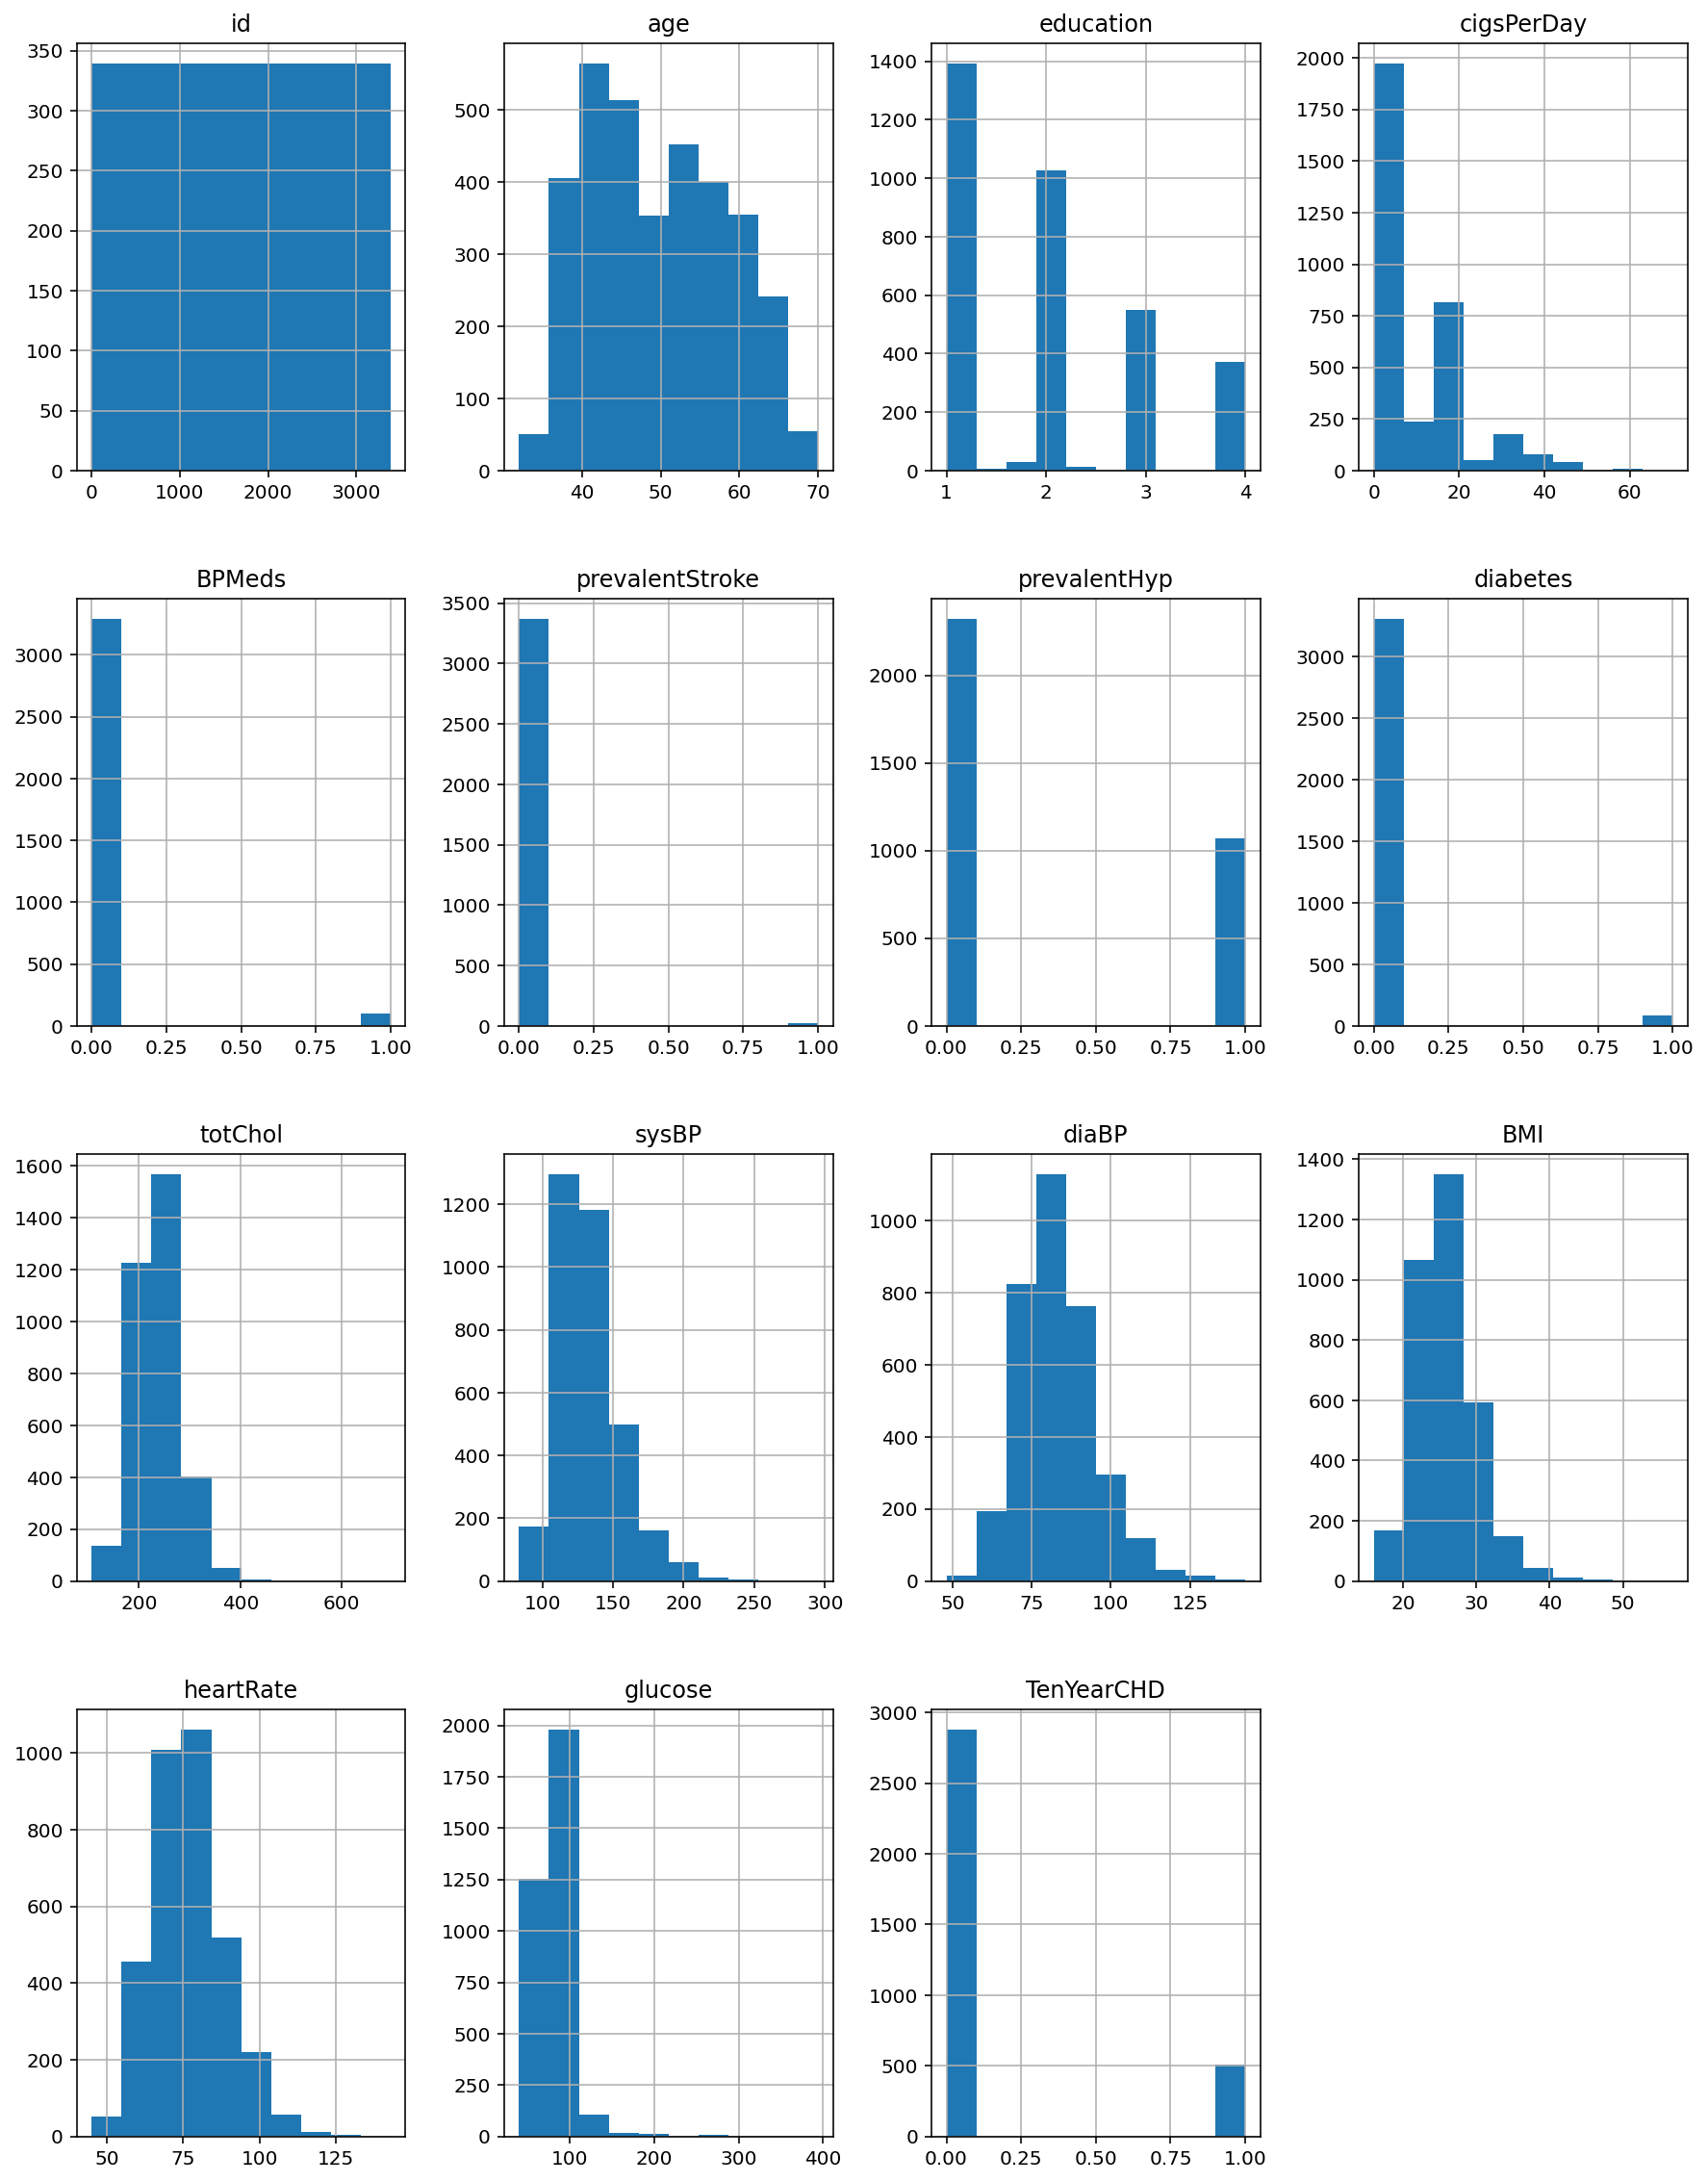

In [14]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cardio_df.hist(ax = ax)

It is easy to pick out the categorical and continuous variables from the distribution plots. Also, it can be seen that none of the respondents had prevalent stroke and very few were diabetic, on blood pressure medication or hypertensive. These distributions also raised the suspicion that the data set might not be properly balanced .


observation;-
Slightly more males are suffering from CHD than females.

The percentage of people who have CHD is almost equal between smokers and non smokers.

The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.

A larger percentage of the people who have CHD are on blood pressure medication.

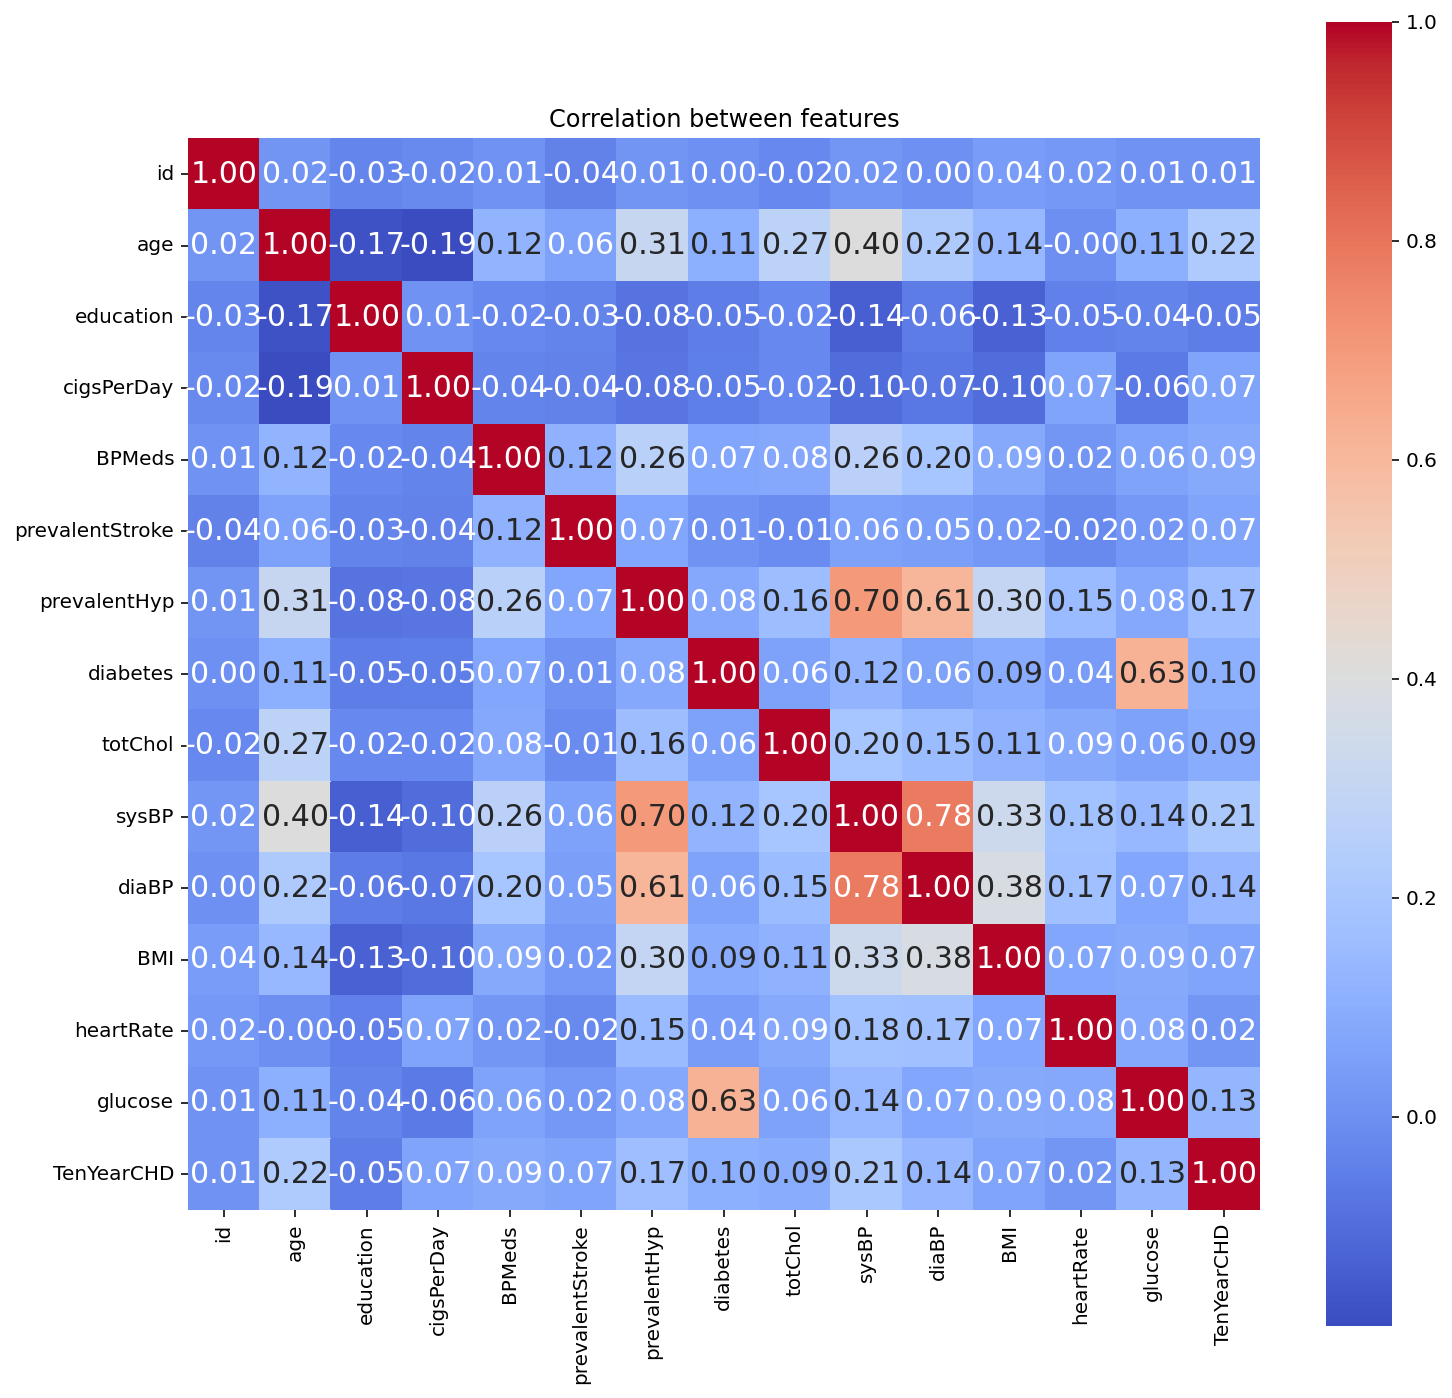

In [15]:
df_corr = cardio_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');


In [16]:
cardio_df = cardio_df.drop(['education'], axis = 1)

In [17]:
cardio_df.isna().sum()

id                 0
age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

I dropped the education feature and built another model to see if education has any effect on the model performance

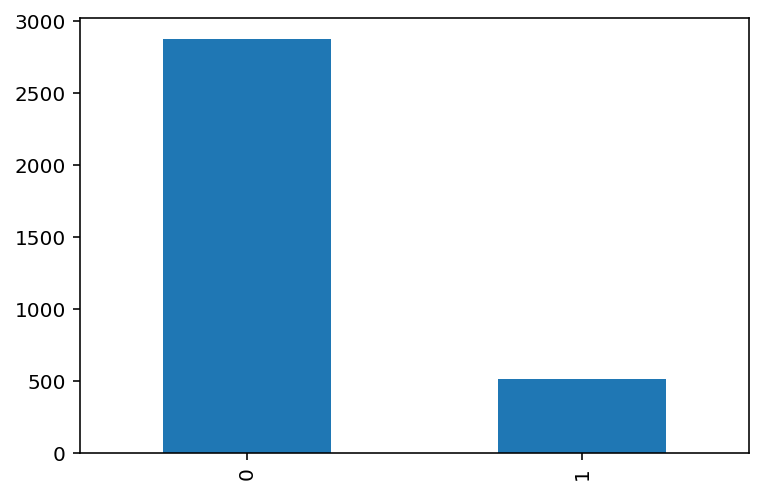

In [18]:
cardio_df['TenYearCHD'].value_counts().plot(x= cardio_df['TenYearCHD'],kind ='bar')

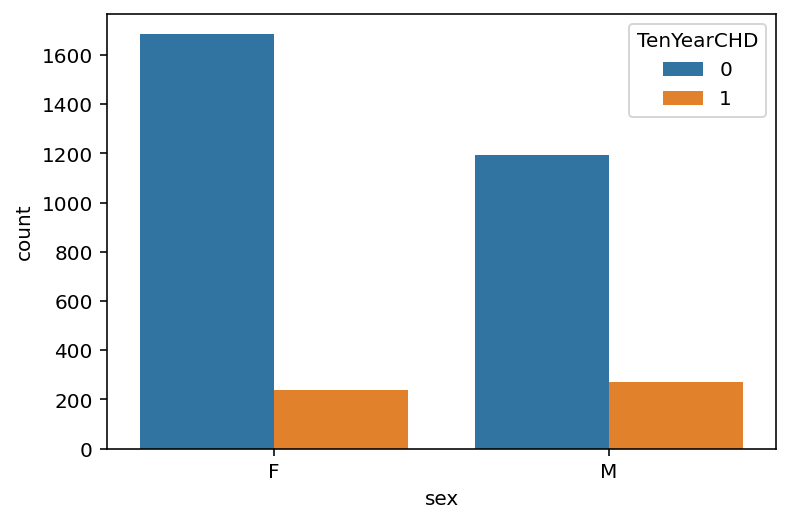

In [19]:
cardio_df_plot = cardio_df.copy()
cardio_df_plot['sex'] = cardio_df_plot['sex'].replace({0:'female',1:'male'})
cardio_df_plot = cardio_df_plot.rename(columns={'male':'sex'})
sns.countplot(data=cardio_df_plot,x='sex',hue='TenYearCHD')

In [20]:
cardio_df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Age group')

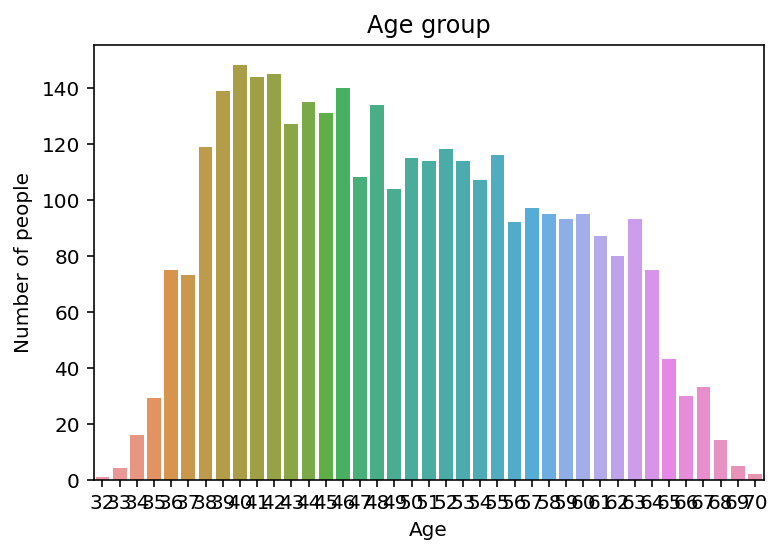

In [21]:
sns.countplot(cardio_df.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Is smoking')

Text(0, 0.5, 'Number of people')

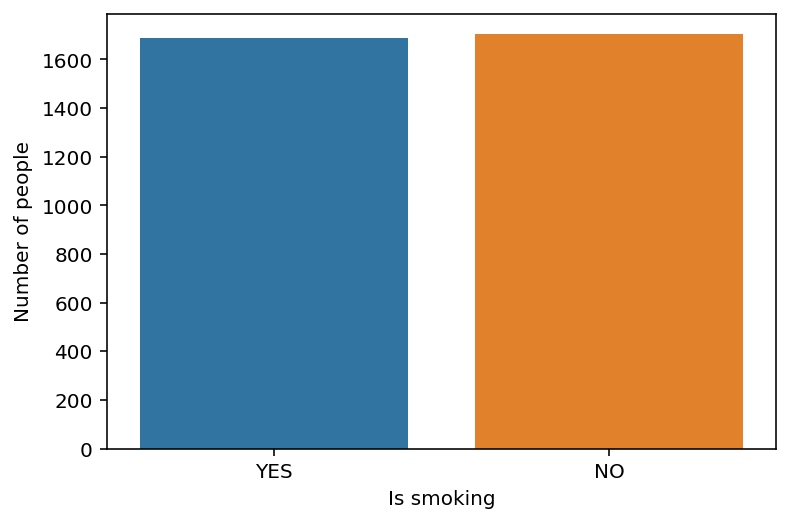

In [22]:
sns.countplot(cardio_df.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cigrattes per Day')

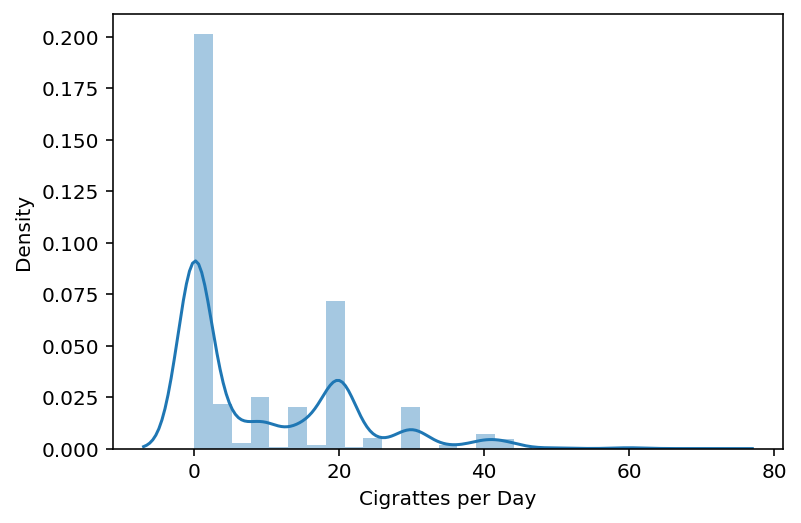

In [23]:
sns.distplot(cardio_df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

In [25]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cigrattes per Day')

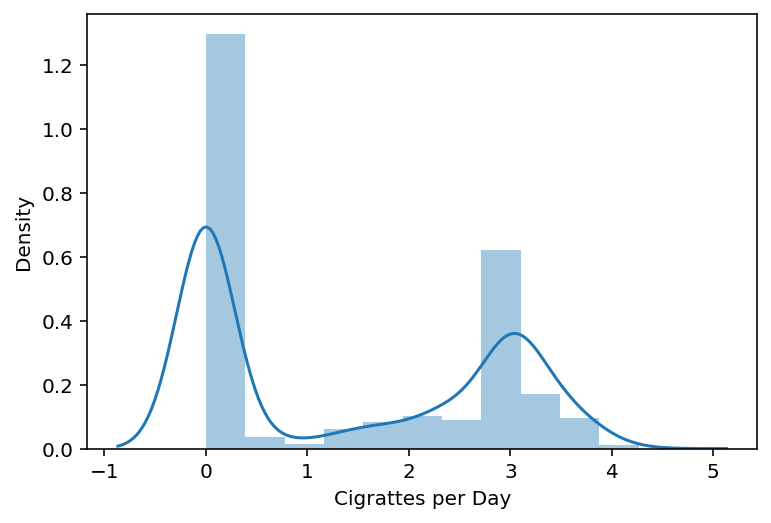

In [26]:
sns.distplot(np.log1p(cardio_df.cigsPerDay))
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Cigrattes per Day')

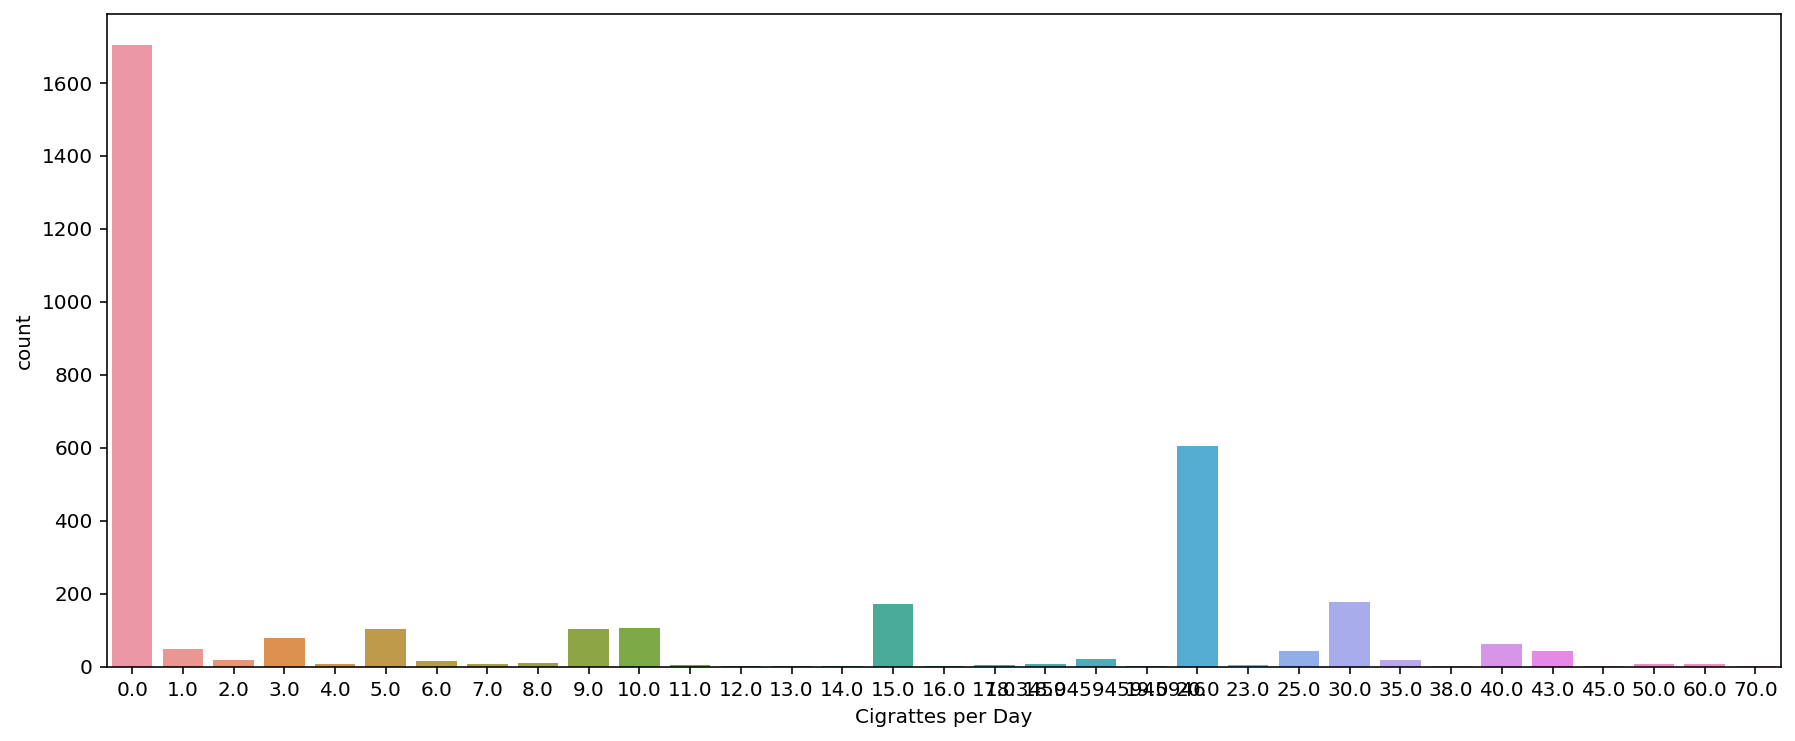

In [29]:
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(cardio_df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'BP Meds')

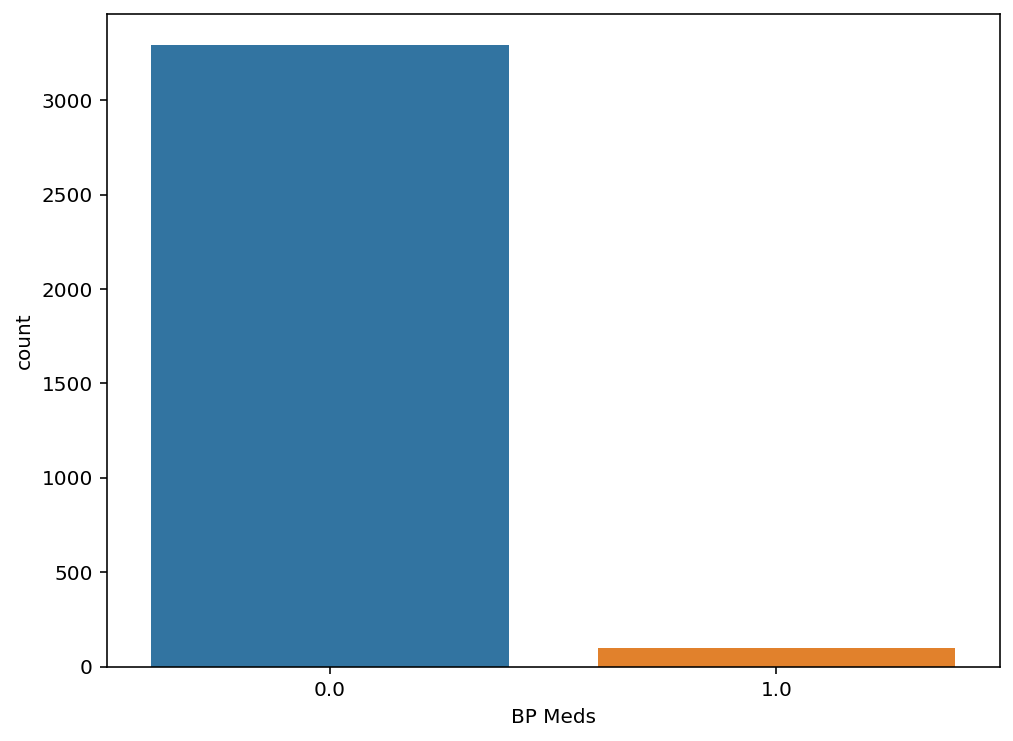

In [27]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(cardio_df.BPMeds)
plt.xlabel("BP Meds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Prevalent Stroke')

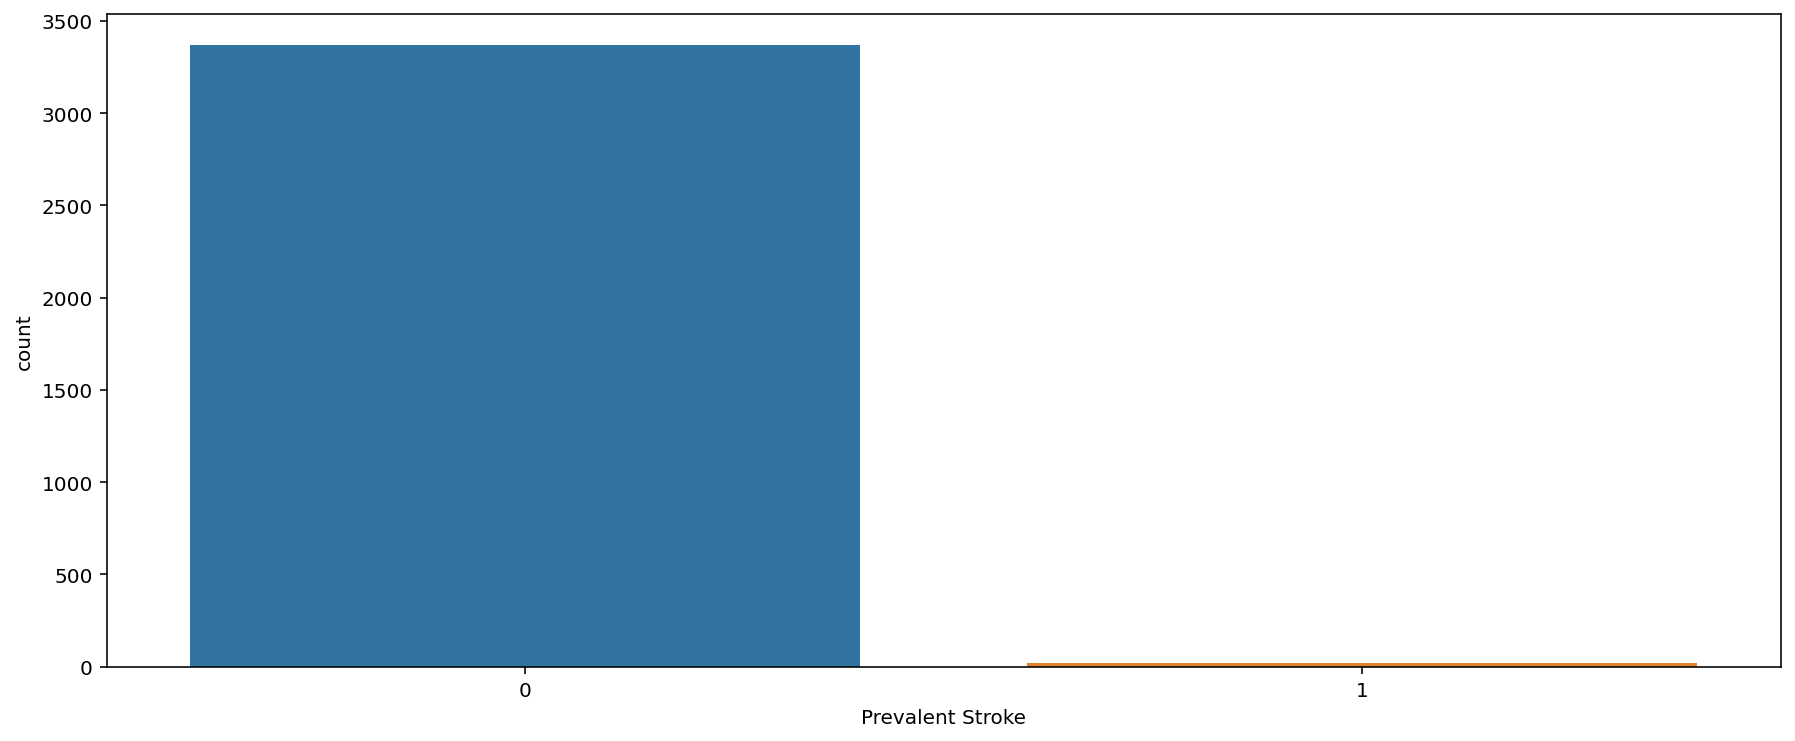

In [30]:
sns.countplot(cardio_df.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Prevalent Hyp')

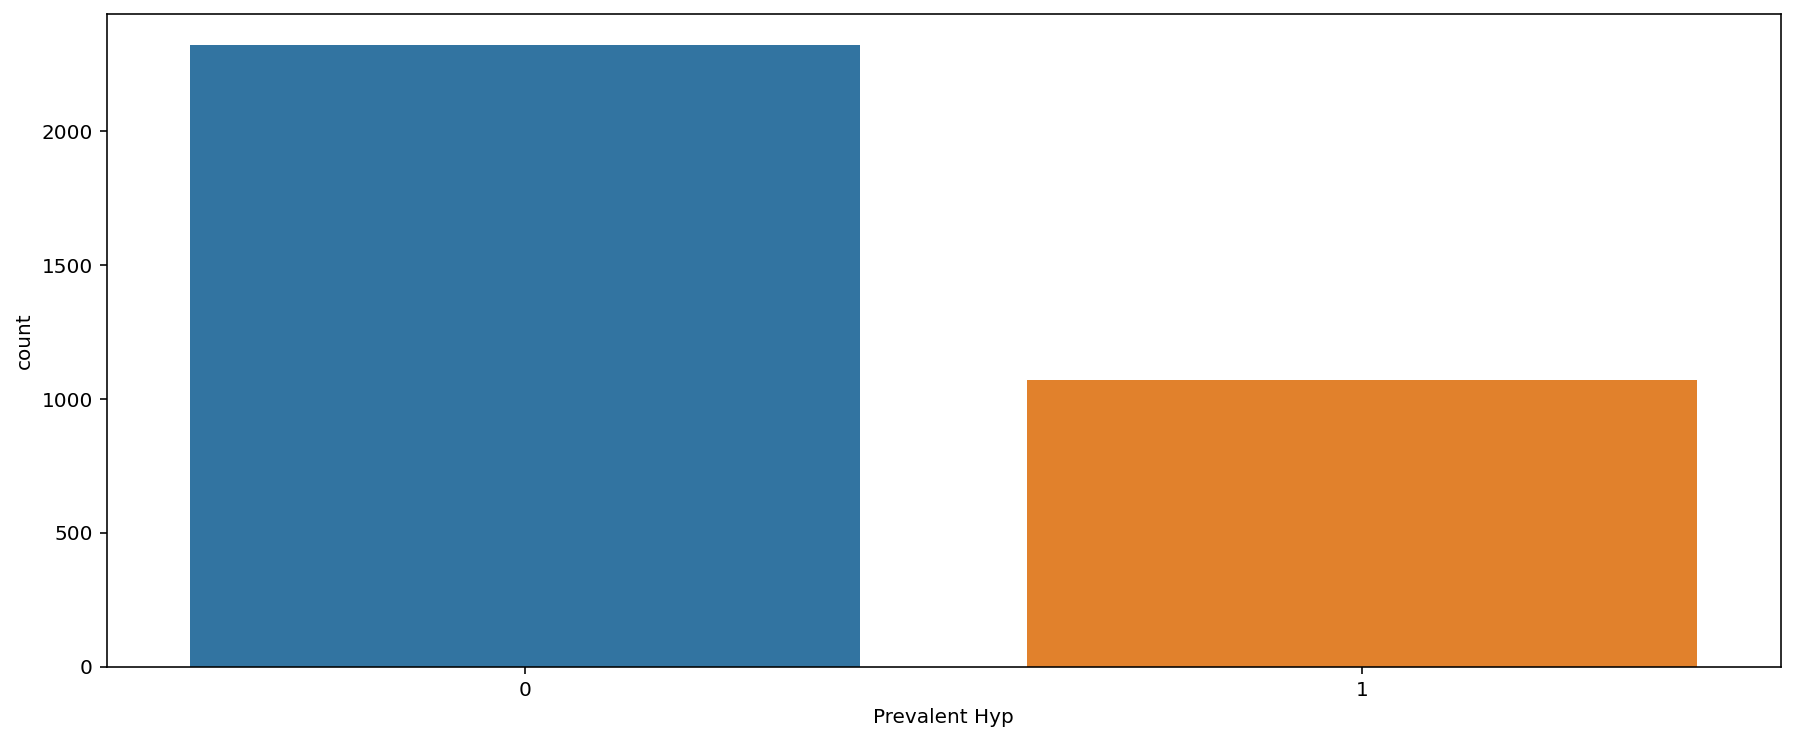

In [31]:
sns.countplot(cardio_df.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Diabetes')

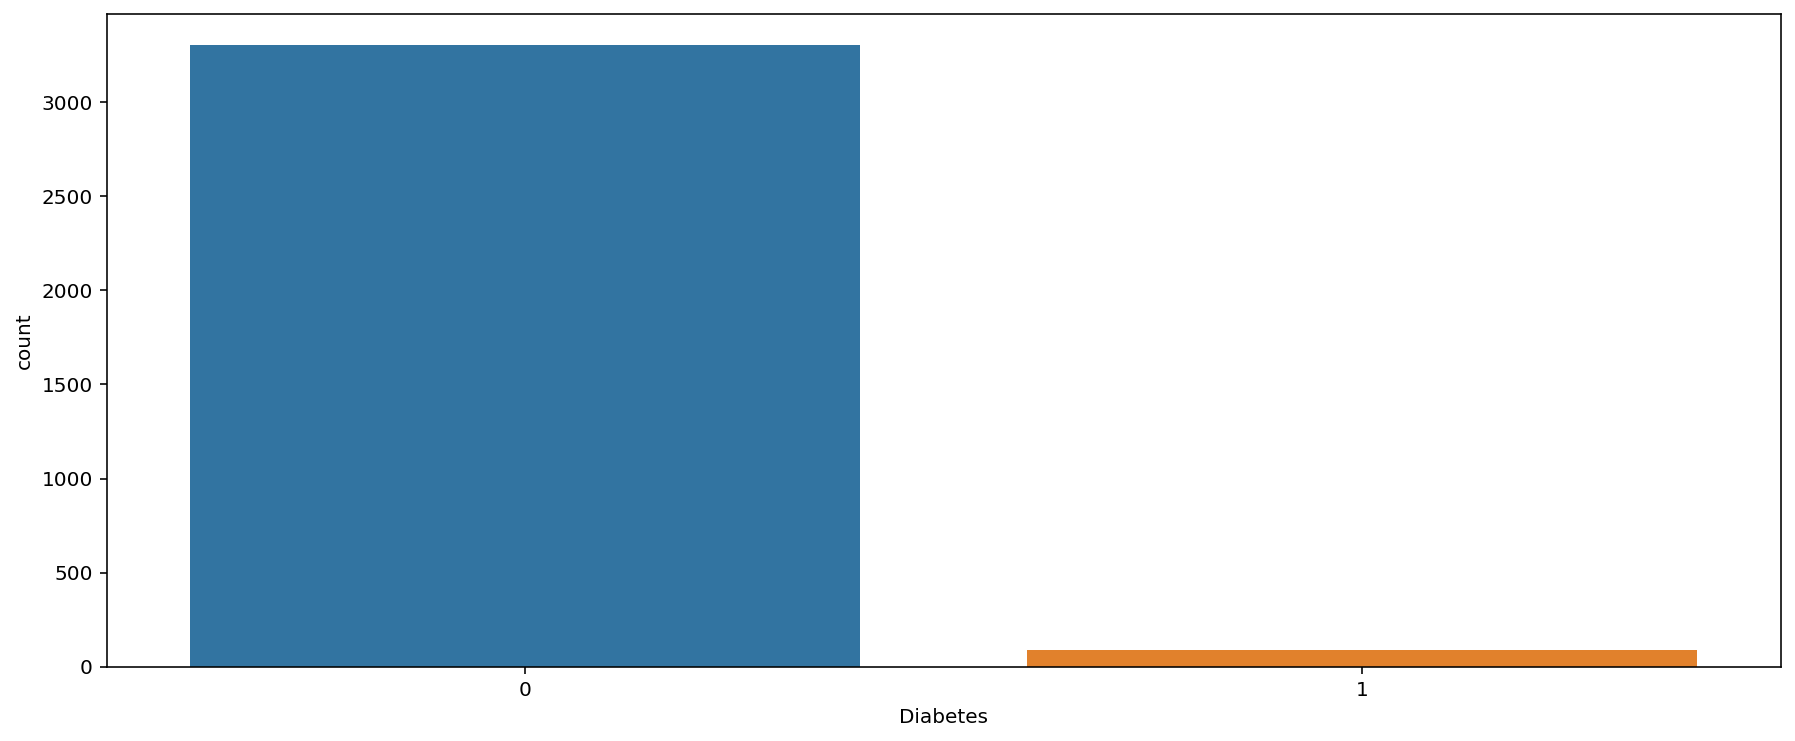

In [32]:
sns.countplot(cardio_df.diabetes)
plt.xlabel("Diabetes")
plt.show()

**Bar chart showing the relationship between diabetes and TenYearCHD**

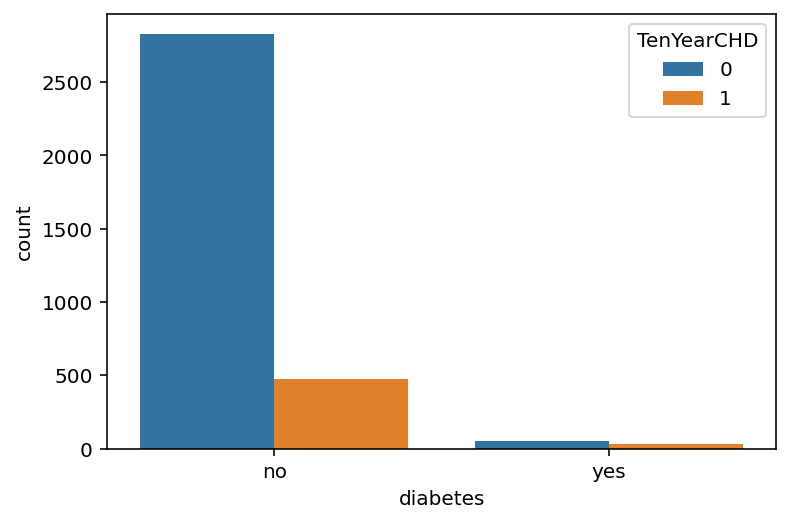

In [ ]:
cardio_df_plot['diabetes'] = cardio_df_plot['diabetes'].replace({0:'no',1:'yes'})
sns.countplot(data=cardio_df_plot,x='diabetes',hue='TenYearCHD')

In [33]:
cardio_df.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean      237.074730
std        44.993041
min       107.000000
50%       235.000000
75%       264.000000
90%       292.000000
95%       313.000000
99%       355.110000
max       696.000000
Name: totChol, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'totChol')

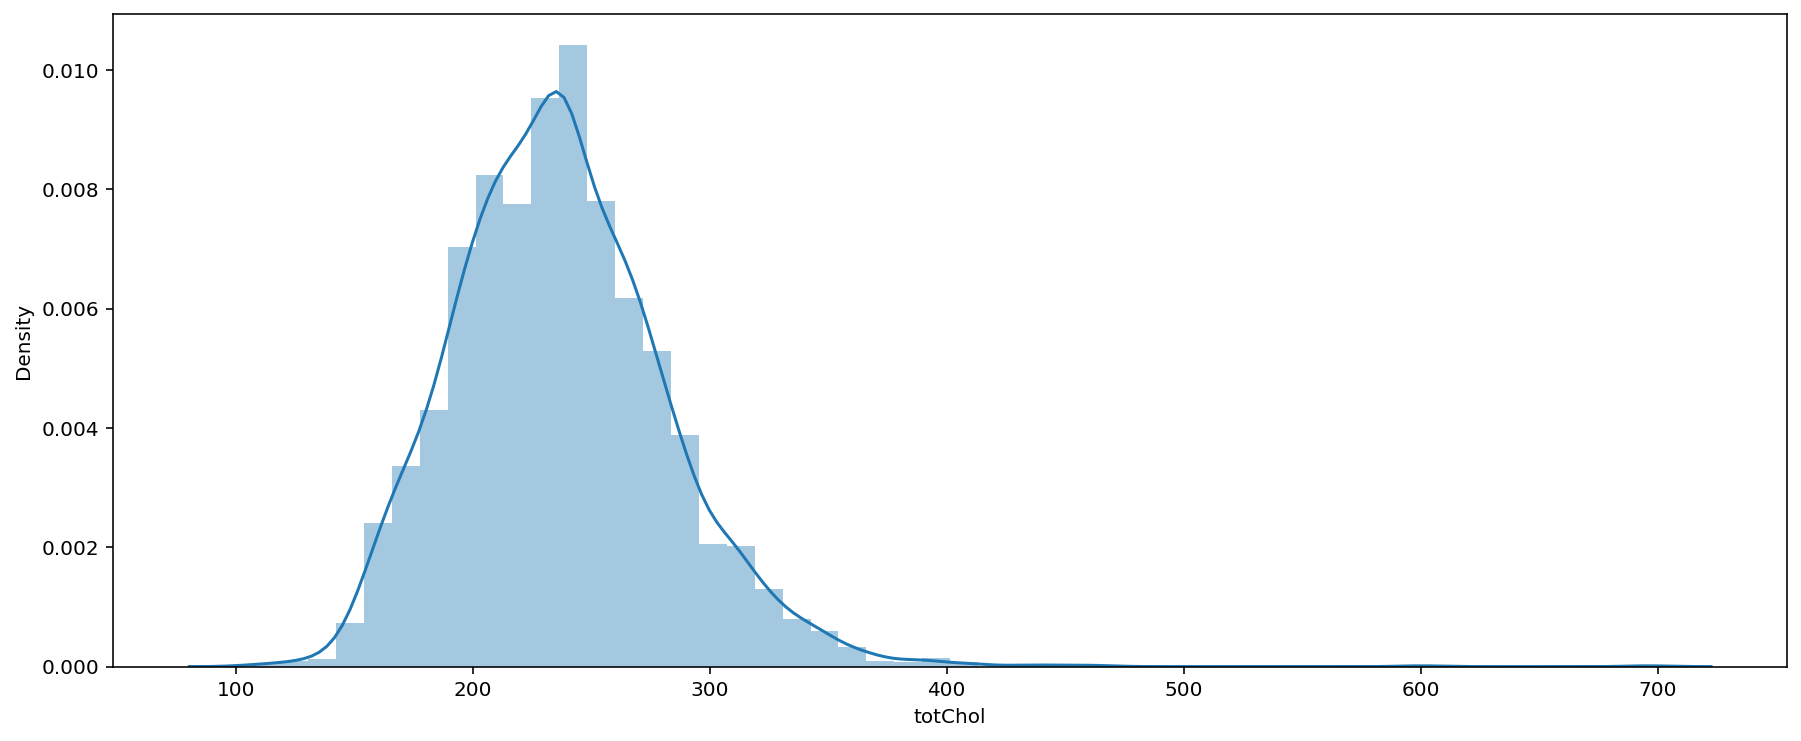

In [34]:
sns.distplot(cardio_df.totChol )
plt.xlabel("totChol")
plt.show()


**Bar chart showing the relationship between age and TenYearCHD**


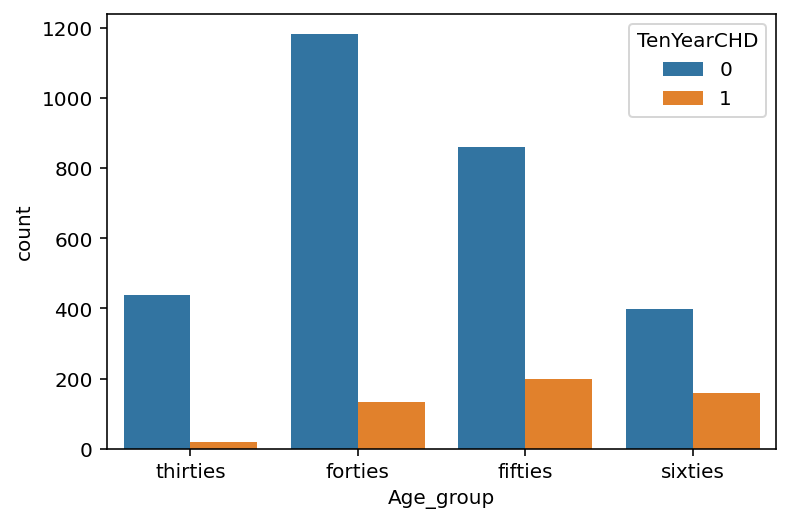

In [ ]:
bins =[30,40,50,60,75]
labels = ['thirties','forties','fifties','sixties',]
cardio_df_plot['Age_group'] = pd.cut(cardio_df_plot['age'], bins=bins,labels=labels,right=False)
sns.countplot(data=cardio_df_plot,x='Age_group',hue='TenYearCHD')


**Bar chart showing the relationship between cigsPerDay and TenYearCHD**

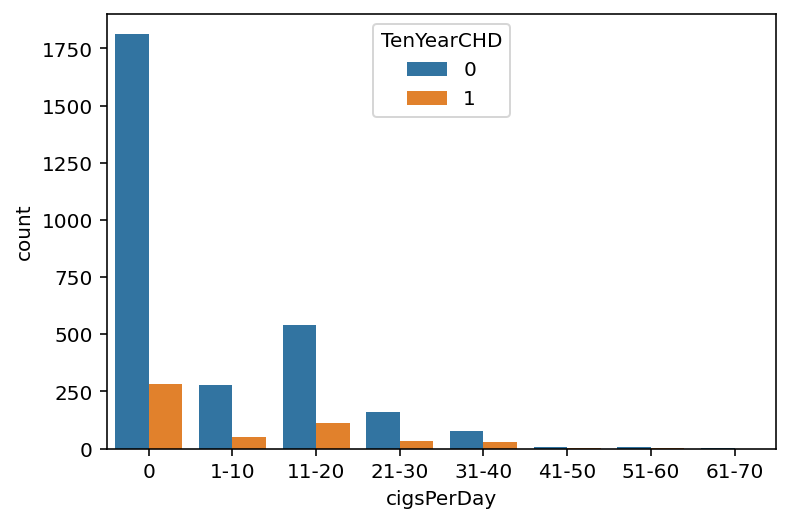

In [ ]:
bins = [0,10,20,30,40,50,60,70,80]
labels = ['0','1-10','11-20','21-30','31-40','41-50','51-60','61-70']
cardio_df_plot['cigsPerDay'] = pd.cut(cardio_df_plot['cigsPerDay'], bins=bins,labels=labels,right=False)
sns.countplot(data=cardio_df_plot,x='cigsPerDay',hue='TenYearCHD')



Observations


*   The dataset is unbalanced, about 85% variables of the dataset do not have the risk of heart disease.
*  Men are more susceptible to heart disease than women


*   Older people are more susceptible to heart disease, so age is a good predictor.
*   Cigs might be a good predictor of the outcome variable


In [ ]:
X = cardio_df.iloc[:, :-1].values
y = cardio_df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
cardio_df.columns

Index(['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP',
       'prevalentHyp', 'diabetes', 'BPMeds', 'sex', 'TenYearCHD'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2712, 14)
(678, 14)


In [ ]:
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

In [ ]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = accuracy_score(predictions,data[output])
  
    kf = KFold(n_splits=5, shuffle=True)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
  
    return accuracy, error

In [ ]:
# variables
prediction_var = list(X.columns)
outcome_var= 'TenYearCHD'

In [ ]:
cardio_df.dtypes

id                   int64
age                  int64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
cardio_df.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,26.038767,90.0,80.0,1
1,1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
cardio_df['sex']=le.fit_transform(cardio_df['sex'])
cardio_df['is_smoking']=le.fit_transform(cardio_df['is_smoking'])


In [ ]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,26.038767,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


# Features selection

It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

Feature Importance provides a score that indicates how helpful each feature was in our model.The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [ ]:
 #Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = cardio_df.iloc[:,0:14]  #independent columns
y = cardio_df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features
           

              Specs       Score
10            sysBP  574.606196
1               age  255.538687
9           totChol  253.961304
4        cigsPerDay  221.160565
0                id  186.486087
11            diaBP  109.298704
7      prevalentHyp   64.377708
8          diabetes   35.506306
5            BPMeds   25.102438
6   prevalentStroke   15.861998
2               sex   13.778390


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,574.606196
1,age,255.538687
9,totChol,253.961304
4,cigsPerDay,221.160565
0,id,186.486087
11,diaBP,109.298704
7,prevalentHyp,64.377708
8,diabetes,35.506306
5,BPMeds,25.102438
6,prevalentStroke,15.861998


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

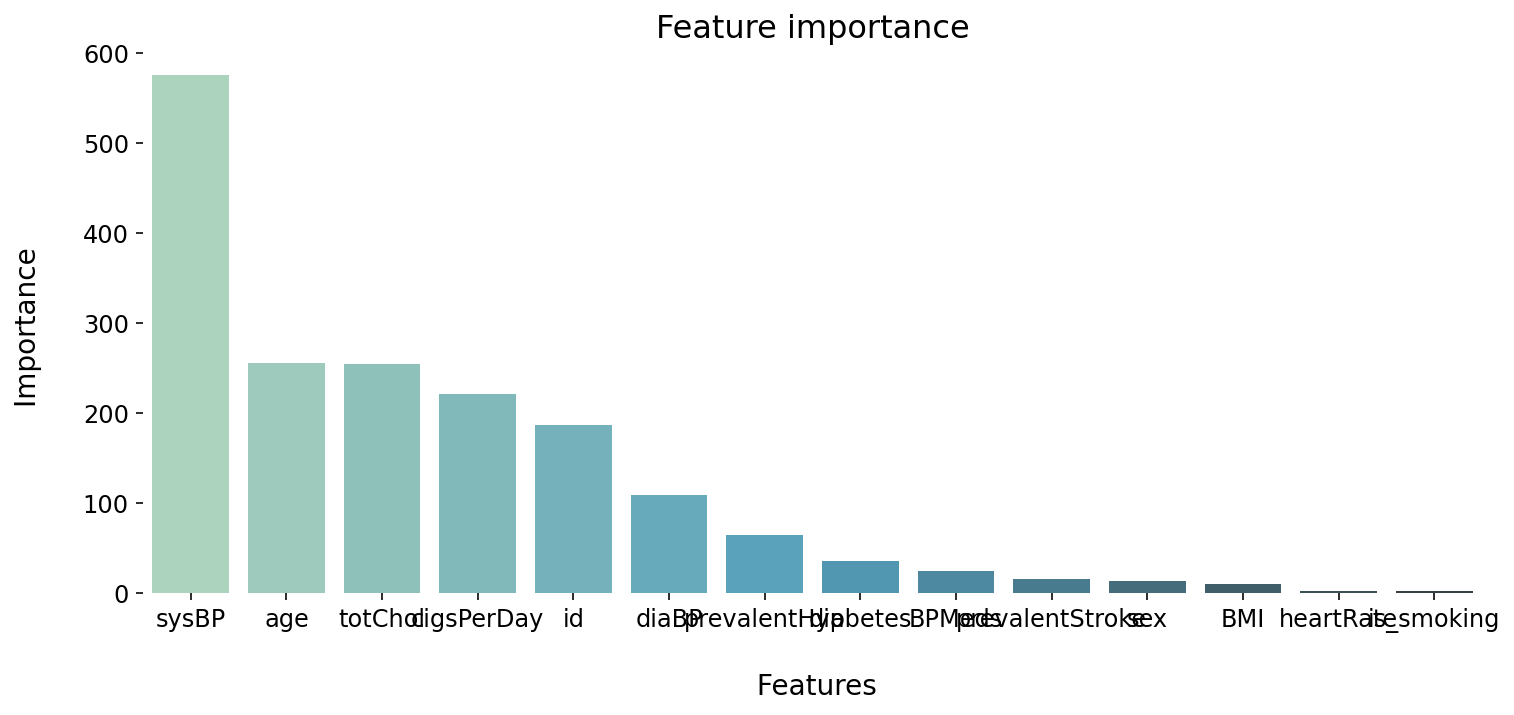

In [ ]:
# visualizing feature selection
plt.figure(figsize=(12,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We will only keep those features that have the strongest relationship with the output variable. These features are:

*   Systolic Blood Pressure
*   Glucose

*   Age

*   Cholesterin
*  Cigarettes per Day 
*  Diastolic Blood Pressure
*  Hypertensive

*   Blood Pressure Medication
*   Gender

In [ ]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'id',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'prevalentStroke']

In [ ]:
cardio_df = cardio_df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','sex','TenYearCHD']]
cardio_df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
0,148.0,80.0,64,221.0,3.0,85.0,0,0,0.0,0,1
1,168.0,75.0,36,212.0,0.0,98.0,1,0,0.0,1,0
2,116.0,94.0,46,250.0,10.0,71.0,0,0,0.0,0,0
3,158.0,94.0,50,233.0,20.0,88.0,1,0,0.0,1,1
4,136.5,77.0,64,241.0,30.0,85.0,0,0,0.0,0,0


# Feature scaling

Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) 
#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(cardio_df), columns=cardio_df.columns)
df_scaled.describe()
cardio_df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,0.232157,0.118482,0.461636,0.220840,0.130424,0.369133,0.315339,0.025664,0.029499,0.432743,0.150737
std,0.105400,0.065812,0.226128,0.076389,0.169484,0.127234,0.464719,0.158153,0.169224,0.495529,0.357846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.090395,0.263158,0.168081,0.000000,0.280423,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.212766,0.111784,0.447368,0.217317,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.286052,0.127119,0.631579,0.266553,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
count,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,132.60118,81.942758,49.542183,237.074730,9.129679,82.883038,0.315339,0.025664,0.029499,0.432743,0.150737
std,22.29203,23.297476,8.592878,44.993041,11.863871,12.023581,0.464719,0.158153,0.169224,0.495529,0.357846
min,83.50000,40.000000,32.000000,107.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.00000,72.000000,42.000000,206.000000,0.000000,74.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.50000,79.571619,49.000000,235.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.00000,85.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.00000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test -Train  split

In [ ]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [ ]:
len(X_train)
len(X_test)

2712

678

# Resampling imbalanced Dataset

Class 0: 2879
Class 1: 511
Proportion: 5.63 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

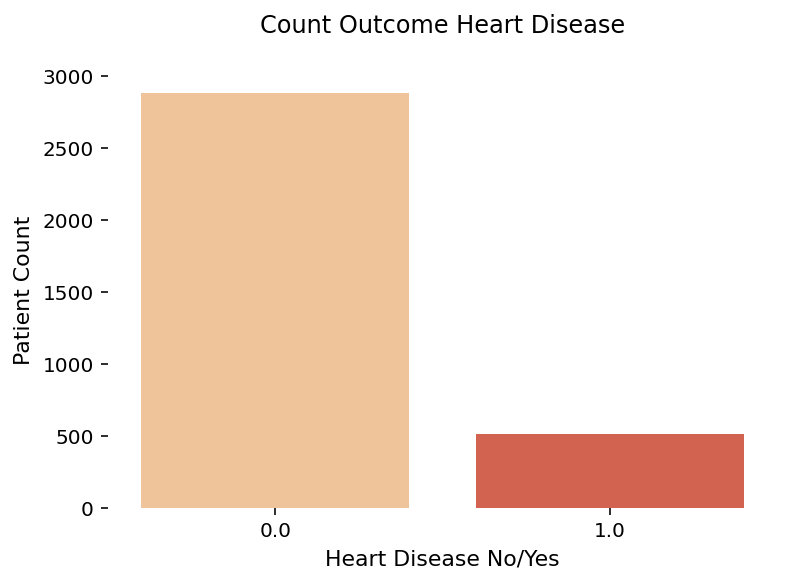

In [ ]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

We can see that the proportion is 6:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

# Undersampling method

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

0.0    611
1.0    511
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

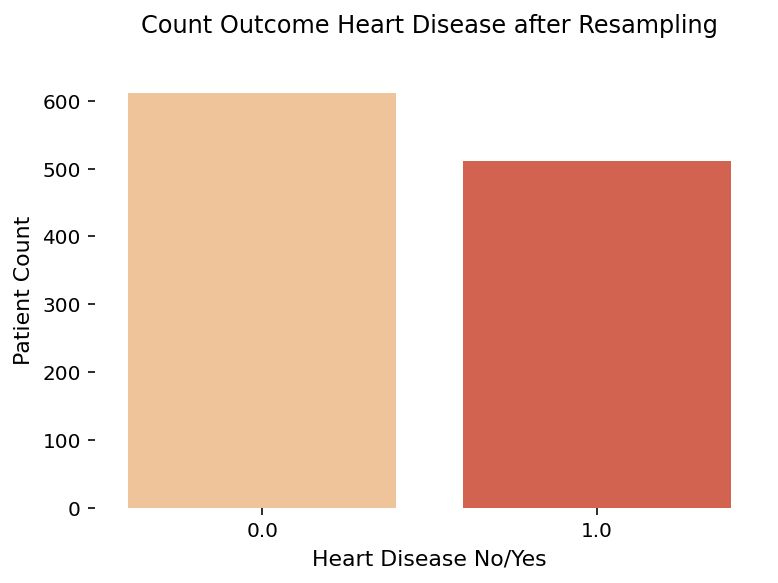

In [ ]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Model pipeline

In [ ]:
from xgboost import XGBClassifier

In [ ]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),XGBClassifier(),GaussianNB(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 70.06%


Pipeline(steps=[('classifier', XGBClassifier())])

The accuracy score of XGBClassifier() is: 71.24%


Pipeline(steps=[('classifier', GaussianNB())])

The accuracy score of GaussianNB() is: 80.97%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 83.33%


# Modelling or Evaluation

To prepare data for modeling, just remember ASN (Assign,Split, Normalize).

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1

**Model 1** **Logistic Regression**

In [ ]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 70.1%
The f1 score for LogReg is: 35.099999999999994%
The precision score for LogReg is: 24.4%
The recall score for LogReg is: 62.5%


Precision, Recall, F1-score and Support:

Precision : be “how many are correctly classified among that class”

Recall : “how many of this class you find over the whole number of element of this class”

F1-score : harmonic mean of precision and recall values.

F1 score reaches its best value at 1 and worst value at 0.

F1 Score = 2 x ((precision x recall) / (precision + recall))

Support: # of samples of the true response that lie in that class.

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

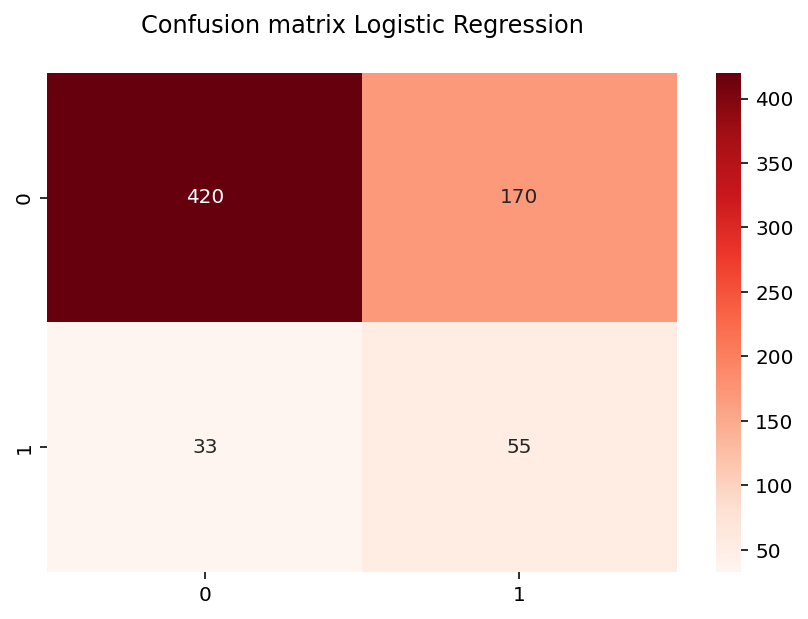

In [ ]:
 #plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

**Model 2 xgboos**t

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from xgboost import XGBClassifier

model_x = XGBClassifier(random_state=1)
model_x.fit(X_train, y_train)
y_pred7 = model_x.predict(X_test)
print(classification_report(y_test, y_pred7))

XGBClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       590
         1.0       0.28      0.76      0.41        88

    accuracy                           0.71       678
   macro avg       0.61      0.73      0.61       678
weighted avg       0.86      0.71      0.76       678



**Model 3 Naive Bayes**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(X_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       590
         1.0       0.31      0.38      0.34        88

    accuracy                           0.81       678
   macro avg       0.61      0.62      0.61       678
weighted avg       0.83      0.81      0.82       678



**Model 4 KNN**

In [ ]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 83.3%
The f1 score for KNN is: 42.6%
The precision score for KNN is: 38.5%
The recall score for KNN is: 47.699999999999996%


**Result: The KNN model has the highest accuracy score**

In [ ]:
#Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  83.33333333333334 %
The accuracy score of the training data is:  77.45 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

In [ ]:
#Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.84365782 0.83333333 0.84365782 0.84070796 0.84955752]
The Accuracy of Model with Cross Validation is: 84.22%


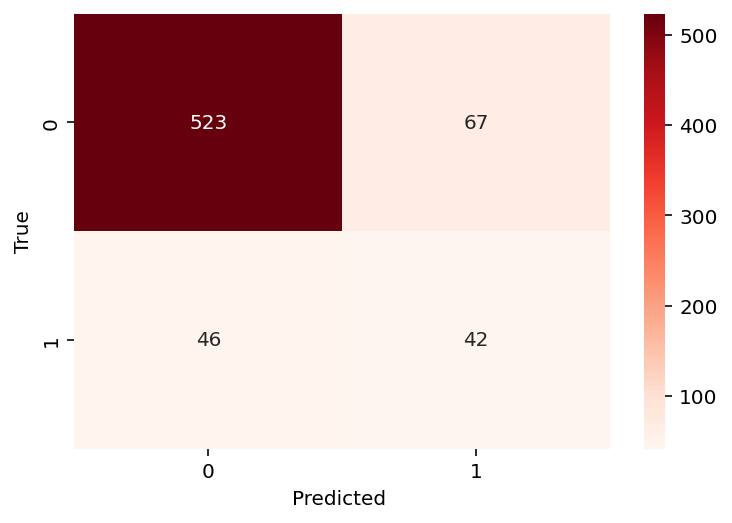

In [ ]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE KNN')

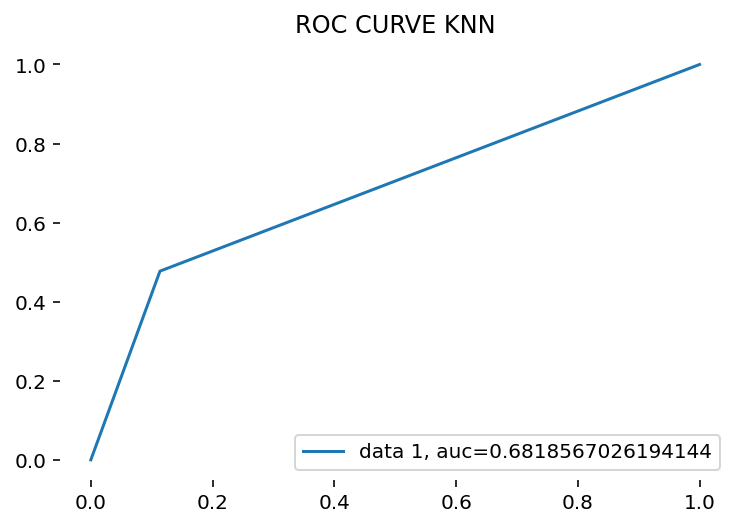

The score for the AUC ROC Curve is: 68.2%


In [ ]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

From comparing the 7 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%.

In [ ]:
cardio_df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
0,148.0,80.0,64,221.0,3.0,85.0,0,0,0.0,0,1
1,168.0,75.0,36,212.0,0.0,98.0,1,0,0.0,1,0
2,116.0,94.0,46,250.0,10.0,71.0,0,0,0.0,0,0
3,158.0,94.0,50,233.0,20.0,88.0,1,0,0.0,1,1
4,136.5,77.0,64,241.0,30.0,85.0,0,0,0.0,0,0


**CONCLUSION**

1.Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were Systolic Blood Pressure(sysbp),Glucose(glc),age,totchol and cigsperday  induced by exercise relative to rest (oldpeak).
 
2.Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symptoms from arising later.

3.Our KNN yields the highest accuracy, 83%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Over fitting). Thus, 80% is the ideal accuracy!